# Webscraping IMDB using R

#### We start by initializing the packages we'll need for the job

In [1]:
library(rvest)
library(stringi)
library(ggplot2)
library(urltools)

Loading required package: xml2

Attaching package: ‘urltools’

The following object is masked from ‘package:xml2’:

    url_parse



#### Grab the actor ID that we scraped using python's requests package

In [2]:
baseurl="http://www.imdb.com/name/"
dh="nm0000163"
rdn='nm0000134'

#### Construct the URL to the actor's page

In [3]:
link=paste(baseurl,dh,sep='')

#### Initialize session in imdb using rvest commands

In [4]:
session <- html_session(link)
content <- read_html(session)

#### Determine HTML path to movie list using selector gadget 

In [5]:
hoffman_links <- html_nodes(content,"#filmo-head-actor+ .filmo-category-section b a" )
hoffman_links <- html_attr(hoffman_links, "href")

#### Initialize variables and loop over movie links to extract movie rating for each link

In [6]:
number_hoffman <- length(hoffman_links)
hoffman_ratings<- c()


for(i in 1:number_hoffman){
  session <- session %>% jump_to(hoffman_links[i])
  movie <- read_html(session)
  rating <- html_nodes(movie,".ratingValue strong span")
  if (length(rating)>0){
    textrating <- html_text(rating)
    hoffman_ratings[i] <- as.numeric(textrating)
  }
}

print("hoffman links)
print(hoffman_links)
print("hoffman ratings")
print(hoffman_ratings)


[1] "hoffman links"
 [1] "/title/tt5536736/?ref_=nm_flmg_act_1" 
 [2] "/title/tt5057130/?ref_=nm_flmg_act_2" 
 [3] "/title/tt2267968/?ref_=nm_flmg_act_3" 
 [4] "/title/tt5513770/?ref_=nm_flmg_act_4" 
 [5] "/title/tt3083008/?ref_=nm_flmg_act_5" 
 [6] "/title/tt3205394/?ref_=nm_flmg_act_6" 
 [7] "/title/tt3203616/?ref_=nm_flmg_act_7" 
 [8] "/title/tt3302706/?ref_=nm_flmg_act_8" 
 [9] "/title/tt2883512/?ref_=nm_flmg_act_9" 
[10] "/title/tt5241256/?ref_=nm_flmg_act_10"
[11] "/title/tt1578887/?ref_=nm_flmg_act_11"
[12] "/title/tt1980162/?ref_=nm_flmg_act_12"
[13] "/title/tt1302011/?ref_=nm_flmg_act_13"
[14] "/title/tt0970866/?ref_=nm_flmg_act_14"
[15] "/title/tt1702433/?ref_=nm_flmg_act_15"
[16] "/title/tt1423894/?ref_=nm_flmg_act_16"
[17] "/title/tt0420238/?ref_=nm_flmg_act_17"
[18] "/title/tt1287845/?ref_=nm_flmg_act_18"
[19] "/title/tt1046947/?ref_=nm_flmg_act_19"
[20] "/title/tt1470016/?ref_=nm_flmg_act_20"
[21] "/title/tt0441773/?ref_=nm_flmg_act_21"
[22] "/title/tt0457419/?ref_=nm_flm

#### Do the same for De Niro

In [7]:
link2=paste(baseurl,rdn,sep='')

session2 <- html_session(link2)
content2 <- read_html(session2)
deniro_links <- content2 %>% html_nodes("#filmo-head-actor+ .filmo-category-section b a")
deniro_links <- deniro_links %>% html_attr("href")


number_deniro <- length(deniro_links)
deniro_ratings<- c()


for(j in 1:number_deniro){
  session2 <- session2 %>% jump_to(deniro_links[j])
  movie2 <- read_html(session2)
  rating2 <- html_nodes(movie2,".ratingValue strong span")
  if (length(rating2)>0){
    textrating2 <- html_text(rating2)
    deniro_ratings[j] <- as.numeric(textrating2)
  }
}

print("deniro links")
print(deniro_links)
print("deniro ratings")
print(deniro_ratings)

function (x, ...) 
UseMethod("print")
<bytecode: 0x7f8bf0090d48>
<environment: namespace:base>

[1] "deniro links"
  [1] "/title/tt1302006/?ref_=nm_flmg_act_1"  
  [2] "/title/tt5960230/?ref_=nm_flmg_act_2"  
  [3] "/title/tt4075436/?ref_=nm_flmg_act_3"  
  [4] "/title/tt6061938/?ref_=nm_flmg_act_4"  
  [5] "/title/tt4532038/?ref_=nm_flmg_act_5"  
  [6] "/title/tt1933667/?ref_=nm_flmg_act_6"  
  [7] "/title/tt1967614/?ref_=nm_flmg_act_7"  
  [8] "/title/tt1781827/?ref_=nm_flmg_act_8"  
  [9] "/title/tt1860213/?ref_=nm_flmg_act_9"  
 [10] "/title/tt2446980/?ref_=nm_flmg_act_10" 
 [11] "/title/tt3276924/?ref_=nm_flmg_act_11" 
 [12] "/title/tt5227516/?ref_=nm_flmg_act_12" 
 [13] "/title/tt4016250/?ref_=nm_flmg_act_13" 
 [14] "/title/tt2361509/?ref_=nm_flmg_act_14" 
 [15] "/title/tt2212008/?ref_=nm_flmg_act_15" 
 [16] "/title/tt1661382/?ref_=nm_flmg_act_16" 
 [17] "/title/tt0072562/?ref_=nm_flmg_act_17" 
 [18] "/title/tt1800241/?ref_=nm_flmg_act_18" 
 [19] "/title/tt1204975/?ref_=nm_flmg_act_19" 
 [20] "/title/tt2404311/?ref_=nm_flmg_act_20" 
 [21] "/title/tt1480295/?ref_=nm_flmg_act

#### Polish it all up so you can let the data tell the story! :-)

In [28]:
library(tidyverse)

hoffman <- as.data.frame(hoffman_ratings)
deniro <- as.data.frame(deniro_ratings)


#### Let's take a look how well we did this time

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”Warning message:
“Removed 7 rows containing non-finite values (stat_density).”

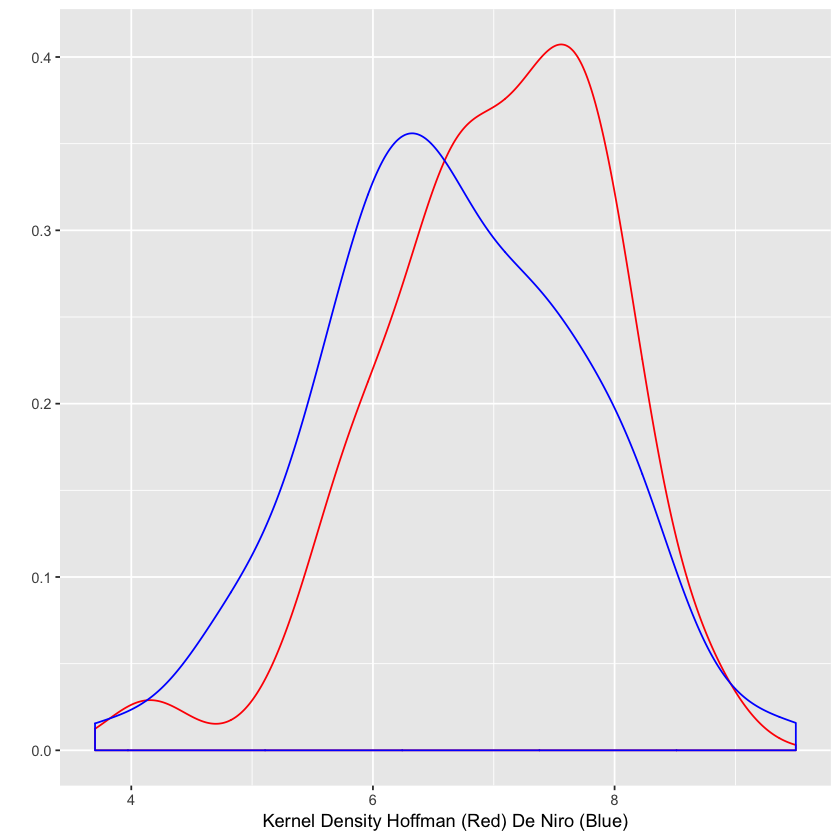

In [29]:
ggplot(hoffman, aes(hoffman_ratings))+
  geom_density(data=hoffman, aes(hoffman_ratings,..density..),color="red")+
  geom_density(data=deniro, aes(deniro_ratings,..density..),color="blue")+
  xlab("Kernel Density Hoffman (Red) De Niro (Blue)" )+
  ylab("")

Warning message:
“Removed 1 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 7 rows containing non-finite values (stat_ecdf).”

Saving 7 x 7 in image
Warning message:
“Removed 1 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 7 rows containing non-finite values (stat_ecdf).”

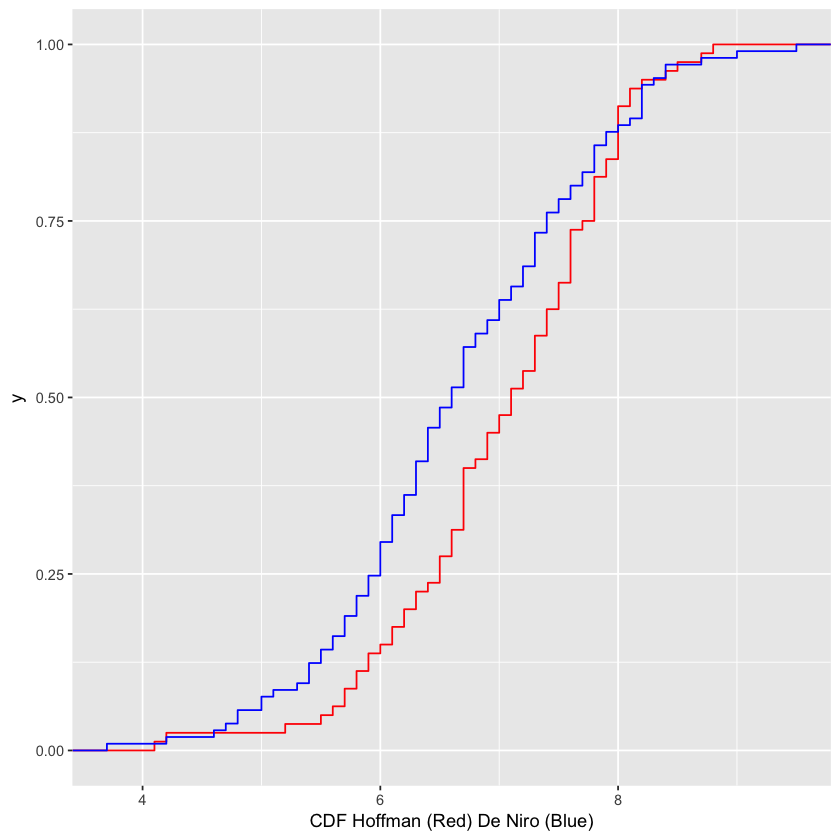

In [27]:
ggplot(hoffman, aes(hoffman_ratings))+
  stat_ecdf(data=hoffman, aes(hoffman_ratings),color="red")+
  stat_ecdf(data=deniro, aes(deniro_ratings),color="blue")+
  xlab("CDF Hoffman (Red) De Niro (Blue)")
ggsave("~/Desktop/cdf.png")